In [117]:
import pandas as pd
from matplotlib_venn import venn2, venn2_unweighted
import matplotlib.pyplot as plt

In [120]:
scan = pd.read_csv('Insetos/Amellifera/Amellifera_tRNAscan.out', sep='\t', skiprows=3, names=['query', 'num', 'start', 'end', 'type', 'codon', 'begin', 'end2', 'score', 'note'])
#scan = scan[['query', 'start', 'end', 'type']]
scan['query'] = scan['query'].str.replace(' ','')

for index, row in scan.iterrows():
    if scan.loc[index,'start'] > scan.loc[index,'end']:
        aux = scan.loc[index,'start']
        scan.loc[index,'start'] = scan.loc[index,'end'] 
        scan.loc[index,'end'] = aux


scan['end'][119] = 5455895
scan['end'][91] = 13661644
scan['end'][190] = 6450380

scan

C:\Users\vitor\AppData\Local\Temp\ipykernel_52412\4152295919.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  scan['end'][119] = 5455895
C:\Users\vitor\AppData\Local\Temp\ipykernel_52412\4152295919.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  scan['end'][91] = 13661644
C:\Users\vitor\AppData\Local\Temp\ipykernel_52412\4152295919.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  scan['end'][190] = 6450380


,query,num,start,end,type,codon,begin,end2,score,note
0,Seq_1,1,1040884,1040956,Lys,CTT,0,0,87.8,NaN
1,Seq_1,2,1055955,1056026,Gln,CTG,0,0,65.3,NaN
2,Seq_1,3,16909428,16909499,iMet,CAT,0,0,63.4,NaN
3,Seq_1,4,24213889,24213961,Phe,GAA,0,0,84.8,NaN
4,Seq_1,5,27315111,27315194,Leu,TAA,0,0,80.3,NaN
...,...,...,...,...,...,...,...,...,...,...
194,Seq_87,7,6742929,6743000,Pro,AGG,0,0,70.2,NaN
195,Seq_87,8,6741841,6741913,Ala,AGC,0,0,67.1,NaN
196,Seq_87,9,6741309,6741382,Thr,AGT,0,0,74.7,NaN
197,Seq_87,10,6732626,6732697,Cys,GCA,0,0,81.2,NaN


In [121]:
vitor = pd.read_csv('Insetos/Amellifera/AmelliferaFinal_tRNA_ResultadoFinal.gff', sep='\t', skiprows=1, names= ['query', 'tool', 'tRNA', 'start', 'end', 'score', 'strand','nada', 'id'])
#vitor = vitor[['query', 'start', 'end', 'id']]
vitor

,query,tool,tRNA,start,end,score,strand,nada,id
0,Seq_1,Infernal,tRNA,1040884,1040956,63.6,+,.,id8
1,Seq_1,Infernal,tRNA,1055955,1056026,64.2,+,.,id9
2,Seq_1,Infernal,tRNA,1542258,1542339,72.7,-,.,id11
3,Seq_1,Infernal,tRNA,2006267,2006348,60.2,-,.,id12
4,Seq_1,Infernal,tRNA,9280209,9280281,69.5,-,.,id20
...,...,...,...,...,...,...,...,...,...
197,Seq_87,Both,tRNA,6741841,6741913,135.0,+,.,id517
198,Seq_87,Both,tRNA,6742929,6743000,134.0,+,.,id518
199,Seq_87,Both,tRNA,6743415,6743486,134.0,+,.,id519
200,Seq_87,Both,tRNA,6748301,6748372,134.0,+,.,id521


In [122]:
junto = pd.merge(vitor, scan, how='outer', on=['query','start', 'end'], indicator=True)
junto

,query,tool,tRNA,start,end,score_x,strand,nada,id,num,type,codon,begin,end2,score_y,note,_merge
0,Seq_1,Infernal,tRNA,1040884,1040956,63.6,+,.,id8,1.0,Lys,CTT,0.0,0.0,87.8,NaN,both
1,Seq_1,Infernal,tRNA,1055955,1056026,64.2,+,.,id9,2.0,Gln,CTG,0.0,0.0,65.3,NaN,both
2,Seq_1,Infernal,tRNA,1542258,1542339,72.7,-,.,id11,8.0,Ser,CGA,0.0,0.0,87.7,NaN,both
3,Seq_1,Infernal,tRNA,2006267,2006348,60.2,-,.,id12,7.0,Leu,AAG,0.0,0.0,71.6,NaN,both
4,Seq_1,Infernal,tRNA,9280209,9280281,69.5,-,.,id20,6.0,Arg,TCG,0.0,0.0,68.3,NaN,both
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
204,Seq_4,NaN,NaN,8500447,8500519,NaN,NaN,NaN,NaN,13.0,Val,AAC,0.0,0.0,81.6,NaN,right_only
205,Seq_5,NaN,NaN,8132218,8132290,NaN,NaN,NaN,NaN,14.0,Val,AAC,0.0,0.0,81.6,NaN,right_only
206,Seq_14,NaN,NaN,9555195,9555267,NaN,NaN,NaN,NaN,11.0,Val,CAC,0.0,0.0,80.1,NaN,right_only
207,Seq_44,NaN,NaN,13136059,13136131,NaN,NaN,NaN,NaN,3.0,Ala,GGC,0.0,0.0,20.3,pseudo,right_only


In [123]:
junto = junto.sort_values(by=['query', 'start'])

In [124]:
notBoth = junto[junto['_merge']!='both']
notBoth

,query,tool,tRNA,start,end,score_x,strand,nada,id,num,type,codon,begin,end2,score_y,note,_merge
7,Seq_1,Infernal,tRNA,26105318,26105387,33.3,-,.,id47,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
9,Seq_10,Infernal,tRNA,3281911,3281979,31.2,+,.,id51,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
19,Seq_103,Infernal,tRNA,19181,19249,32.2,+,.,id73,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
206,Seq_14,NaN,NaN,9555195,9555267,NaN,NaN,NaN,NaN,11.0,Val,CAC,0.0,0.0,80.1,NaN,right_only
38,Seq_177,Infernal,tRNA,1592,1659,32.4,-,.,id122,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
41,Seq_18,Infernal,tRNA,3247937,3248005,29.5,-,.,id131,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
47,Seq_18,Blast,tRNA,11124653,11124723,132.0,+,.,id154,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
72,Seq_2,Blast,tRNA,14307147,14310230,5696.0,+,.,id197,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
202,Seq_4,NaN,NaN,2106997,2107069,NaN,NaN,NaN,NaN,1.0,Val,AAC,0.0,0.0,81.6,NaN,right_only
204,Seq_4,NaN,NaN,8500447,8500519,NaN,NaN,NaN,NaN,13.0,Val,AAC,0.0,0.0,81.6,NaN,right_only


In [361]:
def diagrama_venn(resultFinal, nameI):
    plt.clf()
    QtdFerramenta = resultFinal['source'].value_counts(dropna=False, sort=True)
    QtdFerramenta = QtdFerramenta.to_frame().T
    
    try:
        set3 = int(QtdFerramenta['Both'])
    except:
        set3=0
    try:
        set2 = int(QtdFerramenta['VitorTool'])
    except:
        set2=0
    try:
        set1 = int(QtdFerramenta['tRNAScan-SE'])
    except:
        set1=0
    
    plt.title(nameI)
    out = venn2_unweighted(subsets = (set1, set2, set3), set_labels = ('tRNAscan', 'VitorTool'), set_colors=('purple', 'skyblue'))
    for text in out.set_labels:
       text.set_fontsize(25)
    for text in out.subset_labels:
       text.set_fontsize(18)
    plt.savefig(nameI+'_DiagramaVeen.png', format='png', dpi=1200)

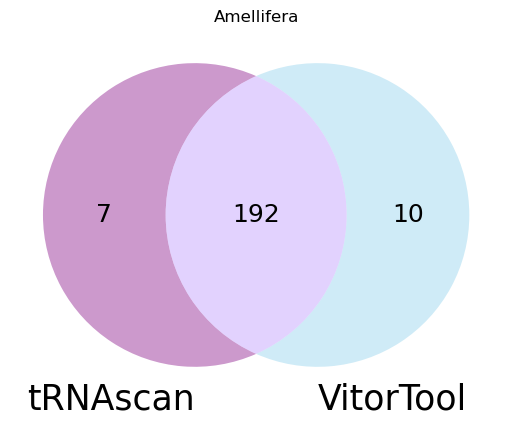

In [126]:
diagrama_venn(junto, 'Amellifera')

In [128]:
junto

,query,tool,tRNA,start,end,score_x,strand,nada,id,num,type,codon,begin,end2,score_y,note,_merge
0,Seq_1,Infernal,tRNA,1040884,1040956,63.6,+,.,id8,1.0,Lys,CTT,0.0,0.0,87.8,NaN,both
1,Seq_1,Infernal,tRNA,1055955,1056026,64.2,+,.,id9,2.0,Gln,CTG,0.0,0.0,65.3,NaN,both
2,Seq_1,Infernal,tRNA,1542258,1542339,72.7,-,.,id11,8.0,Ser,CGA,0.0,0.0,87.7,NaN,both
3,Seq_1,Infernal,tRNA,2006267,2006348,60.2,-,.,id12,7.0,Leu,AAG,0.0,0.0,71.6,NaN,both
4,Seq_1,Infernal,tRNA,9280209,9280281,69.5,-,.,id20,6.0,Arg,TCG,0.0,0.0,68.3,NaN,both
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
197,Seq_87,Both,tRNA,6741841,6741913,135.0,+,.,id517,8.0,Ala,AGC,0.0,0.0,67.1,NaN,both
198,Seq_87,Both,tRNA,6742929,6743000,134.0,+,.,id518,7.0,Pro,AGG,0.0,0.0,70.2,NaN,both
199,Seq_87,Both,tRNA,6743415,6743486,134.0,+,.,id519,5.0,Pro,CGG,0.0,0.0,70.2,NaN,both
200,Seq_87,Both,tRNA,6748301,6748372,134.0,+,.,id521,6.0,Pro,AGG,0.0,0.0,70.2,NaN,both


In [164]:
junto['type']=junto['type'].fillna('')
lista = list(junto['type'])

In [165]:
lista = list(map(lambda x: "tRNA-" + x, lista))
junto['type'] = lista

In [166]:
junto

,query,tool,tRNA,start,end,score_x,strand,nada,id,num,type,codon,begin,end2,score_y,note,_merge
0,Seq_1,Infernal,tRNA,1040884,1040956,63.6,+,.,id8,1.0,tRNA-Lys,CTT,0.0,0.0,87.8,NaN,both
1,Seq_1,Infernal,tRNA,1055955,1056026,64.2,+,.,id9,2.0,tRNA-Gln,CTG,0.0,0.0,65.3,NaN,both
2,Seq_1,Infernal,tRNA,1542258,1542339,72.7,-,.,id11,8.0,tRNA-Ser,CGA,0.0,0.0,87.7,NaN,both
3,Seq_1,Infernal,tRNA,2006267,2006348,60.2,-,.,id12,7.0,tRNA-Leu,AAG,0.0,0.0,71.6,NaN,both
4,Seq_1,Infernal,tRNA,9280209,9280281,69.5,-,.,id20,6.0,tRNA-Arg,TCG,0.0,0.0,68.3,NaN,both
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
197,Seq_87,Both,tRNA,6741841,6741913,135.0,+,.,id517,8.0,tRNA-Ala,AGC,0.0,0.0,67.1,NaN,both
198,Seq_87,Both,tRNA,6742929,6743000,134.0,+,.,id518,7.0,tRNA-Pro,AGG,0.0,0.0,70.2,NaN,both
199,Seq_87,Both,tRNA,6743415,6743486,134.0,+,.,id519,5.0,tRNA-Pro,CGG,0.0,0.0,70.2,NaN,both
200,Seq_87,Both,tRNA,6748301,6748372,134.0,+,.,id521,6.0,tRNA-Pro,AGG,0.0,0.0,70.2,NaN,both


In [174]:
junto['_merge'] = junto['_merge'].replace('left_only', 'VitorTool')
junto['_merge'] = junto['_merge'].replace('right_only', 'tRNAscan')
junto['strand'] = junto['strand'].fillna('.')
junto['_merge'].unique()

['both', 'VitorTool', 'tRNAscan']
Categories (3, object): ['VitorTool', 'tRNAscan', 'both']

In [171]:
def max_value(junto):
    return max(junto['score_x'], junto['score_y'])

junto['max'] = junto.apply(max_value, axis=1)

In [175]:
junto['strand'].unique()

array(['+', '-', '.'], dtype=object)

In [178]:
###Salva em GFF        
def salvar_gff(resultFinalFinal, nameI):      
    
    gff = pd.DataFrame(columns=['seq_id', 'source', 'type', 'start', 'end', 'score', 'strand', 'phase', 'attributes'])
    gff['seq_id'] = resultFinalFinal['query']
    gff['source'] = resultFinalFinal['_merge']
    gff['type'] = resultFinalFinal['type']
    gff['start'] = resultFinalFinal['start']
    gff['end'] = resultFinalFinal['end']
    gff['score'] = resultFinalFinal['max']
    gff['strand'] = resultFinalFinal['strand']
    gff['phase'] = '.'
    gff['attributes'] = resultFinalFinal['id'] #resultado do blast/infernal
    gff.to_csv(nameI+'_ResultadoFinal.gff3', sep='\t',mode='a', index=False, header=False)
    
    file = open(nameI+'_ResultadoFinal.gff3', 'r')
    lines = file.readlines()
    file.close()
    lines.insert(0, "##gff-version 3"+'\n')
    
    file = open(nameI+"_ResultadoFinal.gff3", 'w')
    file.writelines(lines)
    file.close()
    
    return gff

In [179]:
salvar_gff(junto, 'Amellifera')

,seq_id,source,type,start,end,score,strand,phase,attributes
0,Seq_1,both,tRNA-Lys,1040884,1040956,87.8,+,.,id8
1,Seq_1,both,tRNA-Gln,1055955,1056026,65.3,+,.,id9
2,Seq_1,both,tRNA-Ser,1542258,1542339,87.7,-,.,id11
3,Seq_1,both,tRNA-Leu,2006267,2006348,71.6,-,.,id12
4,Seq_1,both,tRNA-Arg,9280209,9280281,69.5,-,.,id20
...,...,...,...,...,...,...,...,...,...
197,Seq_87,both,tRNA-Ala,6741841,6741913,135.0,+,.,id517
198,Seq_87,both,tRNA-Pro,6742929,6743000,134.0,+,.,id518
199,Seq_87,both,tRNA-Pro,6743415,6743486,134.0,+,.,id519
200,Seq_87,both,tRNA-Pro,6748301,6748372,134.0,+,.,id521


In [160]:
#scan[scan['start']==6450306]

In [161]:
#scan['end'][190] = 6450380

# Cupuacu

In [326]:
scan = pd.read_csv('Cupuacu/TgrandC1074/TgrandC1074-Annotation.tRNA.gff3', sep='\t', skiprows=1, names=['seq_id', 'source', 'type', 'start', 'end', 'score', 'strand', 'phase', 'attributes'])
scan = scan[scan['type']=='tRNA']
scanteste = scan['attributes'].str.split('=', n=2, expand = True)
scanteste2 = scanteste[2].str.split(';', n=1, expand=True)
scan['attributes'] = scanteste2[0]

scan['attributes'] = scan['attributes'].str.replace('\d','')
scan['attributes'] = scan['attributes'].str.replace('_gene', '')

for index, row in scan.iterrows():
    if scan.loc[index,'start'] > scan.loc[index,'end']:
        aux = scan.loc[index,'start']
        scan.loc[index,'start'] = scan.loc[index,'end'] 
        scan.loc[index,'end'] = aux


#scan['end'][119] = 5455895
#scan['end'][91] = 13661644
#scan['end'][190] = 6450380

scan

C:\Users\vitor\AppData\Local\Temp\ipykernel_52412\293786677.py:7: FutureWarning: The default value of regex will change from True to False in a future version.
  scan['attributes'] = scan['attributes'].str.replace('\d','')


,seq_id,source,type,start,end,score,strand,phase,attributes
1,chr1,tRNAScan-SE,tRNA,1370702,1370774,89.6,-,.,tRNA-Lys
3,chr1,tRNAScan-SE,tRNA,2250588,2250661,81.8,-,.,tRNA-Ile
5,chr1,tRNAScan-SE,tRNA,2345321,2345404,36.9,-,.,tRNA-Leu
7,chr1,tRNAScan-SE,tRNA,2422543,2422614,84.5,-,.,tRNA-Thr
9,chr1,tRNAScan-SE,tRNA,2619296,2619369,82.6,-,.,tRNA-Ile
...,...,...,...,...,...,...,...,...,...
908,chr4,tRNAScan-SE,tRNA,2499033,2499105,54.0,-,.,tRNA-Lys
910,chr4,tRNAScan-SE,tRNA,2346505,2346577,79.2,-,.,tRNA-Glu
912,chr4,tRNAScan-SE,tRNA,2216717,2216790,72.9,-,.,tRNA-Val
914,chr4,tRNAScan-SE,tRNA,1775491,1775564,84.6,-,.,tRNA-Asn


In [327]:
scan['attributes'].unique()

array(['tRNA-Lys', 'tRNA-Ile', 'tRNA-Leu', 'tRNA-Thr', 'tRNA-Pro',
       'tRNA-Glu', 'tRNA-Arg', 'tRNA-Asn', 'tRNA-Met', 'tRNA-Ala',
       'tRNA-Gln', 'tRNA-Xxx', 'tRNA-Asp', 'tRNA-Val', 'tRNA-Gly',
       'tRNA-His', 'tRNA-Ser', 'tRNA-iMet', 'tRNA-Tyr', 'tRNA-Phe',
       'tRNA-Trp', 'tRNA-Cys'], dtype=object)

In [335]:
vitorTgrandC1074 = pd.read_csv('Cupuacu/TgrandC1074/TgrandC1074Final_tRNA_ResultadoFinal.gff', sep='\t', skiprows=1, names=['seq_id', 'source', 'type', 'start', 'end', 'score', 'strand', 'phase', 'attributes'])
#vitor = vitor[['query', 'start', 'end', 'id']]
vitorTgrandC1074['source'] = 'VitorTool'
vitorTgrandC1074

,seq_id,source,type,start,end,score,strand,phase,attributes
0,chr1,VitorTool,tRNA,319065,319148,41.0,-,.,id1
1,chr1,VitorTool,tRNA,1370702,1370774,74.1,+,.,id3
2,chr1,VitorTool,tRNA,2250588,2250661,64.5,+,.,id6
3,chr1,VitorTool,tRNA,2345321,2345404,33.6,+,.,id7
4,chr1,VitorTool,tRNA,2422543,2422614,67.7,+,.,id9
...,...,...,...,...,...,...,...,...,...
410,chr9,VitorTool,tRNA,30990788,30990859,57.5,-,.,id3064
411,chr9,VitorTool,tRNA,30993253,30993324,55.4,+,.,id3065
412,chr9,VitorTool,tRNA,32259898,32259970,65.1,-,.,id3071
413,chr9,VitorTool,tRNA,32358664,32358736,57.0,+,.,id3072


In [329]:
scan['end'][187] = 31302781
scan['start'][187] = 31302722
scan['end'][131] = 5357992
scan['end'][30] = 9027681
scan['end'][39] = 11189266
scan['start'][39] = 11189188
scan['end'][84] = 29335008
scan['start'][76] = 45340100
scan['end'][660] = 7414675
scan['start'][664] = 7433059
scan['end'][663] = 7433151
scan['start'][680] = 8913252
scan['end'][669] = 8913336
scan['start'][675] = 14263983
scan['end'][674] = 14264019
scan['start'][411] = 872494
scan['start'][413] = 972090
scan['end'][433] = 40707665
scan['start'][433] = 40707588
scan['start'][624] = 7212042
scan['end'][605] = 41941342
scan['start'][606] = 41941252
scan['end'][570] = 46452438
scan['start'][571] = 46452344
scan['end'][784] = 3592424
scan['start'][785] = 3592337
scan['start'][886] = 8291024
scan['end'][801] = 13048401
scan['start'][802] = 13048316
scan['end'][876] = 39888754
scan['start'][876] = 39888683
scan['end'][814] = 41067255
scan['start'][815] = 41067170
scan['end'][846] = 45447396
scan['end'][335] = 1348262
scan['start'][335] = 1348194
scan['end'][317] = 5696544
scan['start'][318] = 5696458
scan['end'][314] = 6675802
scan['start'][315] = 6675717
scan['end'][761] = 6222006
scan['start'][762] = 6221922
scan['end'][718] = 6731639
scan['start'][719] = 6731547
scan['end'][144] = 2189730
scan['start'][145] = 2189644
scan['end'][191] = 31167522
scan['start'][192] = 31167433
scan['end'][808] = 38654248
scan['start'][808] = 38654194

junto = pd.merge(vitor, scan, how='outer', on=['seq_id','start', 'end'], indicator=True)
junto['_merge'] = junto['_merge'].replace('left_only', 'VitorTool')
junto['_merge'] = junto['_merge'].replace('right_only', 'tRNAscan')
junto = junto.sort_values(by=['seq_id', 'start'])
junto = junto.drop_duplicates(subset=['seq_id', 'start', 'end'])
junto

C:\Users\vitor\AppData\Local\Temp\ipykernel_52412\1088210506.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  scan['end'][187] = 31302781
C:\Users\vitor\AppData\Local\Temp\ipykernel_52412\1088210506.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  scan['start'][187] = 31302722
C:\Users\vitor\AppData\Local\Temp\ipykernel_52412\1088210506.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  scan['end'][131] = 5357992
C:\Users\vitor\

,seq_id,source_x,type_x,start,end,score_x,strand_x,phase_x,attributes_x,source_y,type_y,score_y,strand_y,phase_y,attributes_y,_merge
0,chr1,Infernal,tRNA,319065,319148,41.0,-,.,id1,tRNAScan-SE,tRNA,55.6,-,.,tRNA-Leu,both
1,chr1,Infernal,tRNA,1370702,1370774,74.1,+,.,id3,tRNAScan-SE,tRNA,89.6,-,.,tRNA-Lys,both
2,chr1,Infernal,tRNA,2250588,2250661,64.5,+,.,id6,tRNAScan-SE,tRNA,81.8,-,.,tRNA-Ile,both
3,chr1,Infernal,tRNA,2345321,2345404,33.6,+,.,id7,tRNAScan-SE,tRNA,36.9,-,.,tRNA-Leu,both
4,chr1,Infernal,tRNA,2422543,2422614,67.7,+,.,id9,tRNAScan-SE,tRNA,84.5,-,.,tRNA-Thr,both
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
423,chr9,Infernal,tRNA,30993253,30993324,55.4,+,.,id3065,tRNAScan-SE,tRNA,67.4,-,.,tRNA-Pro,both
424,chr9,Infernal,tRNA,32259898,32259970,65.1,-,.,id3071,tRNAScan-SE,tRNA,78.3,-,.,tRNA-Phe,both
425,chr9,Infernal,tRNA,32358664,32358736,57.0,+,.,id3072,tRNAScan-SE,tRNA,63.4,-,.,tRNA-Ala,both
449,chr9,NaN,NaN,32445253,32445332,NaN,NaN,NaN,NaN,tRNAScan-SE,tRNA,22.2,-,.,tRNA-Ile,tRNAscan


In [330]:
pd.set_option('display.max_rows', 10)
notBoth = junto[junto['_merge']!='both']
notBoth

,seq_id,source_x,type_x,start,end,score_x,strand_x,phase_x,attributes_x,source_y,type_y,score_y,strand_y,phase_y,attributes_y,_merge
437,chr1,NaN,NaN,5357937,5357992,NaN,NaN,NaN,NaN,tRNAScan-SE,tRNA,69.7,-,.,tRNA-Tyr,tRNAscan
436,chr1,NaN,NaN,7378367,7378438,NaN,NaN,NaN,NaN,tRNAScan-SE,tRNA,47.3,-,.,tRNA-Pro,tRNAscan
427,chr1,NaN,NaN,8555493,8555530,NaN,NaN,NaN,NaN,tRNAScan-SE,tRNA,47.3,-,.,tRNA-Met,tRNAscan
428,chr1,NaN,NaN,8555543,8555578,NaN,NaN,NaN,NaN,tRNAScan-SE,tRNA,47.3,-,.,tRNA-Met,tRNAscan
429,chr1,NaN,NaN,9027646,9027681,NaN,NaN,NaN,NaN,tRNAScan-SE,tRNA,64.2,-,.,tRNA-Met,tRNAscan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
438,chr8,NaN,NaN,23636408,23636474,NaN,NaN,NaN,NaN,tRNAScan-SE,tRNA,24.6,-,.,tRNA-Xxx,tRNAscan
439,chr8,NaN,NaN,27445429,27445507,NaN,NaN,NaN,NaN,tRNAScan-SE,tRNA,23.8,-,.,tRNA-Ala,tRNAscan
450,chr9,NaN,NaN,7506306,7506378,NaN,NaN,NaN,NaN,tRNAScan-SE,tRNA,23.0,-,.,tRNA-Lys,tRNAscan
448,chr9,NaN,NaN,27241093,27241163,NaN,NaN,NaN,NaN,tRNAScan-SE,tRNA,22.8,-,.,tRNA-Gly,tRNAscan


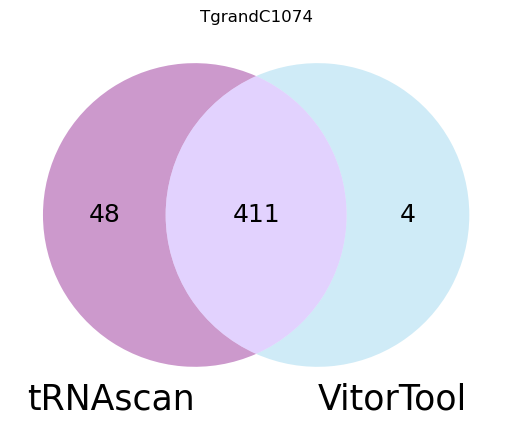

In [334]:
diagrama_venn(junto, 'TgrandC1074')

In [315]:
#junto.loc[((junto['start'] >=31167433) & (junto['end'] <=31167522))]
scan[scan['end']==38654256]

,seq_id,source,type,start,end,score,strand,phase,attributes
808,chr4,tRNAScan-SE,tRNA,38654185,38654256,38.3,-,.,tRNA-Gl


In [336]:
def overlaps_blast_infernal(arqBlast, arqInfernal):
        
        operacao = 'U'
        remover=[]
        for i in arqBlast.index:
                for j in arqInfernal.index:
                    
                    if arqBlast.loc[i, 'seq_id']== arqInfernal.loc[j, 'seq_id']:
                        if arqBlast.loc[i, 'start']>= arqInfernal.loc[j, 'start']:
                            maiorFrom = arqBlast.loc[i, 'start']
                            menorFrom = arqInfernal.loc[j, 'start']
                        else:
                            maiorFrom = arqInfernal.loc[j, 'start']
                            menorFrom = arqBlast.loc[i, 'start']
                            
                        if arqBlast.loc[i, 'end']>= arqInfernal.loc[j, 'end']:
                            maiorTo = arqBlast.loc[i, 'end']
                            menorTo = arqInfernal.loc[j, 'end']
                        else:
                            maiorTo = arqInfernal.loc[j, 'end']
                            menorTo = arqBlast.loc[i, 'end']
                        
                        if arqBlast.loc[i, 'start']>= arqInfernal.loc[j, 'start'] and arqBlast.loc[i, 'start']<= arqInfernal.loc[j, 'end'] and arqBlast.loc[i, 'end']>= arqInfernal.loc[j, 'start'] and arqBlast.loc[i, 'end']<= arqInfernal.loc[j, 'end']:
                            if arqBlast.loc[i, 'source'] != arqInfernal.loc[j, 'source']:
                                arqBlast.loc[i, 'attributes'] = arqInfernal.loc[j, 'attributes']
                                remover.append(j)
                                arqBlast.loc[i, 'source'] = 'Both'
                                if operacao == "I":
                                    arqBlast.loc[i, 'start'] = maiorFrom
                                    arqBlast.loc[i, 'end'] = menorTo
                                else:
                                    arqBlast.loc[i, 'start'] = menorFrom
                                    arqBlast.loc[i, 'end'] = maiorTo
                                                   
                        
                        elif arqBlast.loc[i, 'start']>= arqInfernal.loc[j, 'start'] and arqBlast.loc[i, 'start']<= arqInfernal.loc[j, 'end'] and arqBlast.loc[i, 'end']>= arqInfernal.loc[j, 'start'] and arqBlast.loc[i, 'end']>= arqInfernal.loc[j, 'end']:
                            if arqBlast.loc[i, 'source'] != arqInfernal.loc[j, 'source']:
                                arqBlast.loc[i, 'attributes'] = arqInfernal.loc[j, 'attributes']
                                remover.append(j)
                                arqBlast.loc[i, 'source'] = 'Both'
                                if operacao == "I":
                                    arqBlast.loc[i, 'start'] = maiorFrom
                                    arqBlast.loc[i, 'end'] = menorTo
                                else:
                                    arqBlast.loc[i, 'start'] = menorFrom
                                    arqBlast.loc[i, 'end'] = maiorTo
                                                   
                        elif arqBlast.loc[i, 'start']<= arqInfernal.loc[j, 'start'] and arqBlast.loc[i, 'start']<= arqInfernal.loc[j, 'end'] and arqBlast.loc[i, 'end']>= arqInfernal.loc[j, 'start']:
                            if  arqBlast.loc[i, 'source'] != arqInfernal.loc[j, 'source']:
                                arqBlast.loc[i, 'attributes'] = arqInfernal.loc[j, 'attributes']
                                remover.append(j)
                                arqBlast.loc[i, 'source'] = 'Both'
                                if operacao == "I":
                                    arqBlast.loc[i, 'start'] = maiorFrom
                                    arqBlast.loc[i, 'end'] = menorTo
                                else:
                                    arqBlast.loc[i, 'start'] = menorFrom
                                    arqBlast.loc[i, 'end'] = maiorTo
                            
        return arqBlast, arqInfernal.drop(remover)



In [338]:
opecao = 'I'
result1, result2 = overlaps_blast_infernal(vitor, scan)
result1

,seq_id,source,type,start,end,score,strand,phase,attributes
0,chr1,Both,tRNA,319065,319148,41.0,-,.,tRNA-Leu
1,chr1,Both,tRNA,1370702,1370774,74.1,+,.,tRNA-Lys
2,chr1,Both,tRNA,2250588,2250661,64.5,+,.,tRNA-Ile
3,chr1,Both,tRNA,2345321,2345404,33.6,+,.,tRNA-Leu
4,chr1,Both,tRNA,2422543,2422614,67.7,+,.,tRNA-Thr
...,...,...,...,...,...,...,...,...,...
410,chr9,Both,tRNA,30990788,30990859,57.5,-,.,tRNA-Asp
411,chr9,Both,tRNA,30993253,30993324,55.4,+,.,tRNA-Pro
412,chr9,Both,tRNA,32259898,32259970,65.1,-,.,tRNA-Phe
413,chr9,Both,tRNA,32358664,32358736,57.0,+,.,tRNA-Ala


In [348]:
juntoFinal = pd.merge(result1, result2, how ='outer')
juntoFinal = juntoFinal.sort_values(by=['seq_id', 'start'])
juntoFinal

,seq_id,source,type,start,end,score,strand,phase,attributes
0,chr1,Both,tRNA,319065,319148,41.0,-,.,tRNA-Leu
1,chr1,Both,tRNA,1370702,1370774,74.1,+,.,tRNA-Lys
2,chr1,Both,tRNA,2250588,2250661,64.5,+,.,tRNA-Ile
3,chr1,Both,tRNA,2345321,2345404,33.6,+,.,tRNA-Leu
4,chr1,Both,tRNA,2422543,2422614,67.7,+,.,tRNA-Thr
5,chr1,Both,tRNA,2464888,2464961,58.8,-,.,tRNA-Val
6,chr1,Both,tRNA,2619296,2619369,68.3,+,.,tRNA-Ile
7,chr1,Both,tRNA,4248044,4248117,66.3,-,.,tRNA-Thr
8,chr1,Both,tRNA,4863037,4863120,64.0,-,.,tRNA-Leu
9,chr1,Both,tRNA,4942165,4942237,63.9,-,.,tRNA-Glu


C:\Users\vitor\AppData\Local\Temp\ipykernel_52412\3689655703.py:7: FutureWarning: The default value of regex will change from True to False in a future version.
  scanTgrandC1074['attributes'] = scanTgrandC1074['attributes'].str.replace('\d','')


['tRNA-Leu' 'tRNA-Lys' 'tRNA-Ile' 'tRNA-Thr' 'tRNA-Val' 'tRNA-Glu'
 'tRNA-Pro' 'tRNA-Tyr' 'tRNA-Gln' 'tRNA-Arg' 'tRNA-Asn' 'tRNA-Met'
 'tRNA-Ala' 'tRNA-Xxx' 'tRNA-Asp' 'tRNA-Phe' 'tRNA-Gly' 'tRNA-iMet'
 'tRNA-Ser' 'tRNA-His' 'tRNA-Trp' 'tRNA-Cys' 'id1435' 'id1625' 'id1994'
 'id2760']


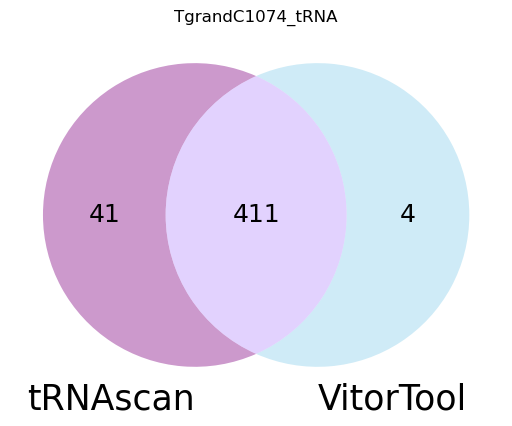

In [367]:
scanTgrandC1074 = pd.read_csv('Cupuacu/TgrandC1074/TgrandC1074-Annotation.tRNA.gff3', sep='\t', skiprows=1, names=['seq_id', 'source', 'type', 'start', 'end', 'score', 'strand', 'phase', 'attributes'])
scanTgrandC1074 = scanTgrandC1074[scanTgrandC1074['type']=='tRNA']
scanTgrandC1074teste = scanTgrandC1074['attributes'].str.split('=', n=2, expand = True)
scanTgrandC1074teste2 = scanTgrandC1074teste[2].str.split(';', n=1, expand=True)
scanTgrandC1074['attributes'] = scanTgrandC1074teste2[0]

scanTgrandC1074['attributes'] = scanTgrandC1074['attributes'].str.replace('\d','')
scanTgrandC1074['attributes'] = scanTgrandC1074['attributes'].str.replace('_gene', '')

for index, row in scanTgrandC1074.iterrows():
    if scanTgrandC1074.loc[index,'start'] > scanTgrandC1074.loc[index,'end']:
        aux = scan.loc[index,'start']
        scanTgrandC1074.loc[index,'start'] = scanTgrandC1074.loc[index,'end'] 
        scanTgrandC1074.loc[index,'end'] = aux


#scan['end'][119] = 5455895
#scan['end'][91] = 13661644
#scan['end'][190] = 6450380

vitorTgrandC1074 = pd.read_csv('Cupuacu/TgrandC1074/TgrandC1074Final_tRNA_ResultadoFinal.gff', sep='\t', skiprows=1, names=['seq_id', 'source', 'type', 'start', 'end', 'score', 'strand', 'phase', 'attributes'])
#vitor = vitor[['query', 'start', 'end', 'id']]
vitorTgrandC1074['source'] = 'VitorTool'

opecao = 'I'
TgrandC1074result1, TgrandC1074result2 = overlaps_blast_infernal(vitorTgrandC1074, scanTgrandC1074)

TgrandC1074Final = pd.merge(TgrandC1074result1, TgrandC1074result2, how ='outer')
TgrandC1074Final = TgrandC1074Final.sort_values(by=['seq_id', 'start'])
print(TgrandC1074Final['attributes'].unique())
diagrama_venn(TgrandC1074Final, 'TgrandC1074_tRNA')

C:\Users\vitor\AppData\Local\Temp\ipykernel_52412\2379095950.py:7: FutureWarning: The default value of regex will change from True to False in a future version.
  scanTgrandC174['attributes'] = scanTgrandC174['attributes'].str.replace('\d','')


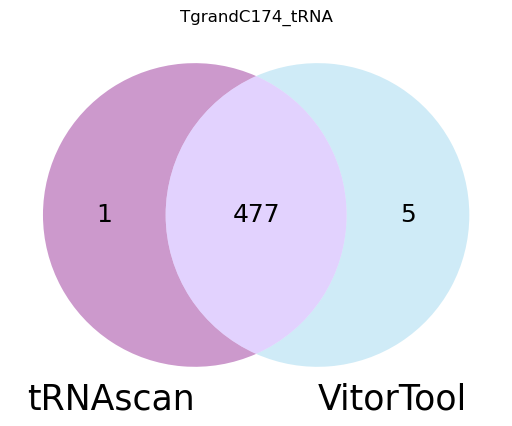

In [363]:
scanTgrandC174 = pd.read_csv('Cupuacu/TgrandC174/TgrandC174-Annotation.tRNA.gff3', sep='\t', skiprows=1, names=['seq_id', 'source', 'type', 'start', 'end', 'score', 'strand', 'phase', 'attributes'])
scanTgrandC174 = scanTgrandC174[scanTgrandC174['type']=='tRNA']
scanTgrandC174teste = scanTgrandC174['attributes'].str.split('=', n=2, expand = True)
scanTgrandC174teste2 = scanTgrandC174teste[2].str.split(';', n=1, expand=True)
scanTgrandC174['attributes'] = scanTgrandC174teste2[0]

scanTgrandC174['attributes'] = scanTgrandC174['attributes'].str.replace('\d','')
scanTgrandC174['attributes'] = scanTgrandC174['attributes'].str.replace('_gene', '')

for index, row in scanTgrandC174.iterrows():
    if scanTgrandC174.loc[index,'start'] > scanTgrandC174.loc[index,'end']:
        aux = scan.loc[index,'start']
        scanTgrandC174.loc[index,'start'] = scanTgrandC174.loc[index,'end'] 
        scanTgrandC174.loc[index,'end'] = aux


#scan['end'][119] = 5455895
#scan['end'][91] = 13661644
#scan['end'][190] = 6450380

vitorTgrandC174 = pd.read_csv('Cupuacu/TgrandC174/TgrandC174Final_tRNA_ResultadoFinal.gff', sep='\t', skiprows=1, names=['seq_id', 'source', 'type', 'start', 'end', 'score', 'strand', 'phase', 'attributes'])
#vitor = vitor[['query', 'start', 'end', 'id']]
vitorTgrandC174['source'] = 'VitorTool'

opecao = 'I'
TgrandC174result1, TgrandC174result2 = overlaps_blast_infernal(vitorTgrandC174, scanTgrandC174)

TgrandC174Final = pd.merge(TgrandC174result1, TgrandC174result2, how ='outer')
TgrandC174Final = TgrandC174Final.sort_values(by=['seq_id', 'start'])
TgrandC174Final
diagrama_venn(TgrandC174Final, 'TgrandC174_tRNA')

C:\Users\vitor\AppData\Local\Temp\ipykernel_52412\830033775.py:10: FutureWarning: The default value of regex will change from True to False in a future version.
  scanTgrandC174P['attributes'] = scanTgrandC174P['attributes'].str.replace('\d','')


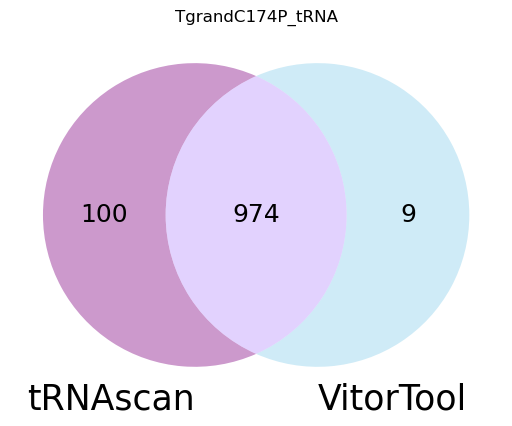

In [364]:
scanTgrandC174P1 = pd.read_csv('Cupuacu/TgrandC174P/TgrandC174-HP1-Annotation.tRNA.gff3', sep='\t', skiprows=1, names=['seq_id', 'source', 'type', 'start', 'end', 'score', 'strand', 'phase', 'attributes'])
scanTgrandC174P2 = pd.read_csv('Cupuacu/TgrandC174P/TgrandC174-HP2-Annotation.tRNA.gff3', sep='\t', skiprows=1, names=['seq_id', 'source', 'type', 'start', 'end', 'score', 'strand', 'phase', 'attributes'])
scanTgrandC174P = pd.merge(scanTgrandC174P1, scanTgrandC174P2, how ='outer')

scanTgrandC174P = scanTgrandC174P[scanTgrandC174P['type']=='tRNA']
scanTgrandC174Pteste = scanTgrandC174P['attributes'].str.split('=', n=2, expand = True)
scanTgrandC174Pteste2 = scanTgrandC174Pteste[2].str.split(';', n=1, expand=True)
scanTgrandC174P['attributes'] = scanTgrandC174Pteste2[0]

scanTgrandC174P['attributes'] = scanTgrandC174P['attributes'].str.replace('\d','')
scanTgrandC174P['attributes'] = scanTgrandC174P['attributes'].str.replace('_gene', '')

for index, row in scanTgrandC174P.iterrows():
    if scanTgrandC174P.loc[index,'start'] > scanTgrandC174P.loc[index,'end']:
        aux = scan.loc[index,'start']
        scanTgrandC174P.loc[index,'start'] = scanTgrandC174P.loc[index,'end'] 
        scanTgrandC174P.loc[index,'end'] = aux


#scan['end'][119] = 5455895
#scan['end'][91] = 13661644
#scan['end'][190] = 6450380

vitorTgrandC174P = pd.read_csv('Cupuacu/TgrandC174P/TgrandC174PFinal_tRNA_ResultadoFinal.gff', sep='\t', skiprows=1, names=['seq_id', 'source', 'type', 'start', 'end', 'score', 'strand', 'phase', 'attributes'])
#vitor = vitor[['query', 'start', 'end', 'id']]
vitorTgrandC174P['source'] = 'VitorTool'

opecao = 'I'
TgrandC174Presult1, TgrandC174Presult2 = overlaps_blast_infernal(vitorTgrandC174P, scanTgrandC174P)

TgrandC174PFinal = pd.merge(TgrandC174Presult1, TgrandC174Presult2, how ='outer')
TgrandC174PFinal = TgrandC174PFinal.sort_values(by=['seq_id', 'start'])
TgrandC174PFinal
diagrama_venn(TgrandC174PFinal, 'TgrandC174P_tRNA')

C:\Users\vitor\AppData\Local\Temp\ipykernel_52412\3725161764.py:10: FutureWarning: The default value of regex will change from True to False in a future version.
  scanTgrandC1074P['attributes'] = scanTgrandC1074P['attributes'].str.replace('\d','')


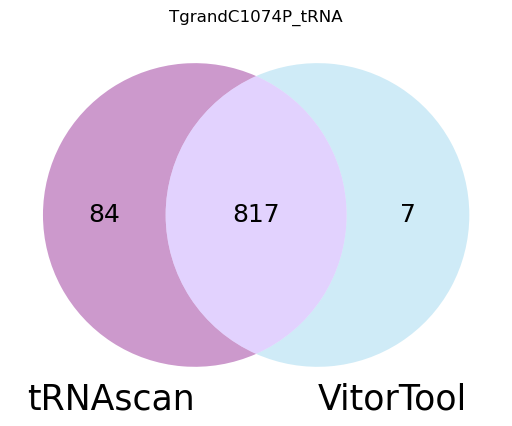

In [365]:
scanTgrandC1074P1 = pd.read_csv('Cupuacu/TgrandC1074P/TgrandC1074-HP1-Annotation.tRNA.gff3', sep='\t', skiprows=1, names=['seq_id', 'source', 'type', 'start', 'end', 'score', 'strand', 'phase', 'attributes'])
scanTgrandC1074P2 = pd.read_csv('Cupuacu/TgrandC1074P/TgrandC1074-HP2-Annotation.tRNA.gff3', sep='\t', skiprows=1, names=['seq_id', 'source', 'type', 'start', 'end', 'score', 'strand', 'phase', 'attributes'])
scanTgrandC1074P = pd.merge(scanTgrandC1074P1, scanTgrandC1074P2, how ='outer')

scanTgrandC1074P = scanTgrandC1074P[scanTgrandC1074P['type']=='tRNA']
scanTgrandC1074Pteste = scanTgrandC1074P['attributes'].str.split('=', n=2, expand = True)
scanTgrandC1074Pteste2 = scanTgrandC1074Pteste[2].str.split(';', n=1, expand=True)
scanTgrandC1074P['attributes'] = scanTgrandC1074Pteste2[0]

scanTgrandC1074P['attributes'] = scanTgrandC1074P['attributes'].str.replace('\d','')
scanTgrandC1074P['attributes'] = scanTgrandC1074P['attributes'].str.replace('_gene', '')

for index, row in scanTgrandC1074P.iterrows():
    if scanTgrandC1074P.loc[index,'start'] > scanTgrandC1074P.loc[index,'end']:
        aux = scan.loc[index,'start']
        scanTgrandC1074P.loc[index,'start'] = scanTgrandC1074P.loc[index,'end'] 
        scanTgrandC1074P.loc[index,'end'] = aux


#scan['end'][119] = 5455895
#scan['end'][91] = 13661644
#scan['end'][190] = 6450380

vitorTgrandC1074P = pd.read_csv('Cupuacu/TgrandC1074P/TgrandC1074PFinal_tRNA_ResultadoFinal.gff', sep='\t', skiprows=1, names=['seq_id', 'source', 'type', 'start', 'end', 'score', 'strand', 'phase', 'attributes'])
#vitor = vitor[['query', 'start', 'end', 'id']]
vitorTgrandC1074P['source'] = 'VitorTool'

opecao = 'I'
TgrandC1074Presult1, TgrandC1074Presult2 = overlaps_blast_infernal(vitorTgrandC1074P, scanTgrandC1074P)

TgrandC1074PFinal = pd.merge(TgrandC1074Presult1, TgrandC1074Presult2, how ='outer')
TgrandC1074PFinal = TgrandC1074PFinal.sort_values(by=['seq_id', 'start'])
TgrandC1074PFinal
diagrama_venn(TgrandC1074PFinal, 'TgrandC1074P_tRNA')

In [371]:
TgrandC1074PFinal['attributes'].unique()

array(['tRNA-Arg', 'tRNA-Glu', 'tRNA-Xxx', 'tRNA-Ala', 'tRNA-Phe',
       'tRNA-Leu', 'tRNA-Trp', 'tRNA-Ser', 'tRNA-Lys', 'tRNA-Met',
       'tRNA-Tyr', 'tRNA-Gln', 'tRNA-Ile', 'tRNA-Thr', 'tRNA-Val',
       'tRNA-Pro', 'tRNA-Asn', 'tRNA-Asp', 'tRNA-Gly', 'tRNA-iMet',
       'tRNA-His', 'tRNA-Cys', 'id2846', 'id3036', 'id3141', 'id3690',
       'id3975', 'id5294', 'id5501'], dtype=object)

In [369]:
###Salva em GFF        
def salvar_gff(resultFinalFinal, nameI):      
    
    gff = pd.DataFrame(columns=['seq_id', 'source', 'type', 'start', 'end', 'score', 'strand', 'phase', 'attributes'])
    gff['seq_id'] = resultFinalFinal['seq_id']
    gff['source'] = resultFinalFinal['source']
    gff['type'] = resultFinalFinal['type']
    gff['start'] = resultFinalFinal['start']
    gff['end'] = resultFinalFinal['end']
    gff['score'] = resultFinalFinal['score']
    gff['strand'] = resultFinalFinal['strand']
    gff['phase'] = '.'
    gff['attributes'] = resultFinalFinal['attributes'] #resultado do blast/infernal
    gff.to_csv(nameI+'_ResultadoFinal.gff3', sep='\t',mode='a', index=False, header=False)
    
    file = open(nameI+'_ResultadoFinal.gff3', 'r')
    lines = file.readlines()
    file.close()
    lines.insert(0, "##gff-version 3"+'\n')
    
    file = open(nameI+"_ResultadoFinal.gff3", 'w')
    file.writelines(lines)
    file.close()
    

In [370]:
salvar_gff(TgrandC1074Final, 'TgrandC1074_tRNA')
salvar_gff(TgrandC1074PFinal, 'TgrandC1074P_tRNA')
salvar_gff(TgrandC174Final, 'TgrandC174_tRNA')
salvar_gff(TgrandC174PFinal, 'TgrandC174P_tRNA')

In [378]:
def qtdTotal_tRNA(tRNA, nameI):
    tRNA['attributes'] = tRNA['attributes'].str.replace('\d','')
    tRNA['attributes'] = tRNA['attributes'].str.replace('id','tRNA')
    QtdTotaltRNA = tRNA['attributes'].value_counts(dropna=False, sort=True)
    QtdTotaltRNA = QtdTotaltRNA.to_frame().reset_index()
    QtdTotaltRNA = QtdTotaltRNA.rename(columns= {'attributes': 'Qtd', 'index':'ncRNA'})

    QtdTotaltRNA.to_csv(nameI+'_Tabela_quantidade_tRNAs.csv', index=False)

In [379]:
qtdTotal_tRNA(TgrandC1074Final, 'TgrandC1074_tRNA')
qtdTotal_tRNA(TgrandC1074PFinal, 'TgrandC1074P_tRNA')
qtdTotal_tRNA(TgrandC174Final, 'TgrandC174_tRNA')
qtdTotal_tRNA(TgrandC174PFinal, 'TgrandC174P_tRNA')

C:\Users\vitor\AppData\Local\Temp\ipykernel_52412\1770491540.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  tRNA['attributes'] = tRNA['attributes'].str.replace('\d','')
C:\Users\vitor\AppData\Local\Temp\ipykernel_52412\1770491540.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  tRNA['attributes'] = tRNA['attributes'].str.replace('\d','')
C:\Users\vitor\AppData\Local\Temp\ipykernel_52412\1770491540.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  tRNA['attributes'] = tRNA['attributes'].str.replace('\d','')
C:\Users\vitor\AppData\Local\Temp\ipykernel_52412\1770491540.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  tRNA['attributes'] = tRNA['attributes'].str.replace('\d','')
